# Mutual Fund Price Prediction

# Mary Donovan Martello

## The goal of this project was to design models to predict mutual fund return values and to identify the features that best predict those return values. This notebook includes feature selection and tests different subsets of input features to see which subset(s) may produce the best results in the predictive models.

# Part 2:  Feature Selection and Test Subsets of Input Features

In [2]:
# import libraries
from __future__ import print_function, division

%matplotlib inline

# import libraries

import numpy as np
import pandas as pd
import random
import yellowbrick
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso


from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.pipeline import make_pipeline

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')

### This data source contains 25,000+ mutual funds with 125 features including general aspects (as total net assets, management company and size), portfolio indicators (as cash, stocks, bonds, and sectors), returns (as year-to-date, 2018-10) and financial ratios (as price/earnings, Treynor and Sharpe ratios, alpha, and beta).  The target variable it year-to-date return (ytd_return) of the mutual funds.

In [3]:
# Load data into a dataframe
# import file
mf = pd.read_csv('Mutual Funds.csv')


In [4]:
mf.head(2)

,fund_name,fund_extended_name,category,fund_family,net_assets,ytd_return,fund_yield,morningstar_rating,inception_date,investment,...,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,530280000.0,12.79,1.43,3,2007-07-29,Blend,...,0.31,0.00,0.73,0.01,5.05,0.05,2.26,0.02,6.71,0.07
1,AAADX,Aberdeen Income Builder Fund Class A,Large Blend,Aberdeen,88840000.0,9.21,2.62,2,2011-12-29,Blend,...,0.62,0.01,0.97,0.01,11.55,0.11,6.91,0.08,12.77,0.14


### This notebook uses two datasets that were cleaned and prepared in the 1_EDA_Prep_Dimension notebook.  One of the datasets included PCA Components.  The other dataset includes the original features before PCA transformation.

In [3]:
pcaDf = pd.read_csv('pcaMFdf4.csv')

In [9]:
df = pd.read_csv('regMFdf2.csv')

## Feature Selection

### Best PCA Features

In [57]:
# function to show best features from the PCA analysis (and the original feature names)
model = PCA(n_components=57, whiten=True).fit(qPredictors)
X_pc = model.transform(qPredictors)
# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['fund_yield', 'morningstar_rating', 'net_annual_expense_ratio_fund',
       'net_annual_expense_ratio_category', 'portfolio_cash',
       'portfolio_stocks', 'portfolio_bonds', 'portfolio_others',
       'portfolio_preferred', 'portfolio_convertable', 'price_book',
       'median_market_cap', 'basic_materials', 'consumer_cyclical',
       'financial_services', 'real_estate', 'consumer_defensive', 'healthcare',
       'utilities', 'communication_services', 'energy', 'industrials',
       'technology', 'rating_aaa', 'rating_aa', 'rating_a', 'rating_bbb',
       'rating_bb', 'rating_b', 'rating_below_b', 'rating_others',
       'morningstar_return_rating', 'category_return_ytd',
       'fund_return_1month', 'category_return_1month', 'fund_return_3months',
       'fund_return_1year', 'category_return_1year', 'fund_return_3years',
       'category_return_3years', 'fund_return_5years',
       'category_return_5years', 'fund_return_10years',
       'category_return_10years', 'fund_return_2018', 'category_return_2018',
       'fund_return_2017', 'category_return_2017', 'fund_return_2016',
       'category_return_2016', 'fund_return_2015', 'category_return_2015',
       'category_return_2011', 'morningstar_risk_rating', 'years_up',
       'years_down', 'fund_alpha_3years', 'category_alpha_3years',
       'fund_alpha_5years', 'category_alpha_5years', 'category_alpha_10years',
       'fund_beta_3years', 'category_beta_3years', 'fund_beta_5years',
       'category_beta_5years', 'category_beta_10years',
       'fund_mean_annual_return_3years', 'category_mean_annual_return_3years',
       'fund_mean_annual_return_5years', 'category_mean_annual_return_5years',
       'category_mean_annual_return_10years', 'fund_r_squared_3years',
       'category_r_squared_3years', 'fund_r_squared_5years',
       'category_r_squared_5years', 'category_r_squared_10years',
       'fund_standard_deviation_3years', 'category_standard_deviation_3years',
       'fund_standard_deviation_5years', 'category_standard_deviation_5years',
       'category_standard_deviation_10years', 'fund_sharpe_ratio_3years',
       'category_sharpe_ratio_3years', 'fund_sharpe_ratio_5years',
       'category_sharpe_ratio_5years', 'category_sharpe_ratio_10years',
       'category_treynor_ratio_3years', 'category_treynor_ratio_5years',
       'category_treynor_ratio_10years', 'net_assets']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
dfpca = pd.DataFrame(sorted(dic.items()))

In [58]:
# print the most important PCA components with the labels from original dataframe
print(dfpca)

       0                               1
0    PC1                      net_assets
1   PC10                fund_return_2015
2   PC11                      price_book
3   PC12                      price_book
4   PC13            category_return_2016
5   PC14            category_return_2011
6   PC15                fund_return_2018
7   PC16                      rating_aaa
8   PC17            category_return_2015
9   PC18            category_return_2015
10  PC19                        rating_a
11   PC2               median_market_cap
12  PC20                      fund_yield
13  PC21         morningstar_risk_rating
14  PC22                     real_estate
15  PC23                      rating_aaa
16  PC24                          energy
17  PC25            category_return_2018
18  PC26              fund_return_1month
19  PC27              fund_return_1month
20  PC28             fund_return_10years
21  PC29                      fund_yield
22   PC3                portfolio_stocks
23  PC30        

### Recursive Feature Selection

> See if RFECV will narrow down important features for the models.

scikit-learn's RFECV to conduct recursive feature elimination using cross-validation



In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [318]:
# create a linear regression
ols = LinearRegression()

In [319]:
# separate into input and output columns (X variable for features and y for target variables)

X = df.drop(['ytd_return', 'investment', 'size'], axis = 1) 
y = df['ytd_return']

In [320]:
# check shape
X.shape

(11796, 90)

In [321]:
# recursively eliminate features
rfecv = RFECV(estimator=ols, step=1, 
              scoring='neg_mean_squared_error')
rfecv.fit(X, y)

RFECV(estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [322]:
rfecv.transform(X)

array([[ 1.43,  3.  ,  1.22, ...,  0.01,  0.05,  0.02],
       [ 0.  ,  3.  ,  1.15, ...,  0.01,  0.13,  0.1 ],
       [ 1.38,  4.  ,  0.91, ...,  0.01,  0.05,  0.03],
       ...,
       [ 1.78,  5.  ,  0.76, ...,  0.01,  0.09,  0.07],
       [ 1.36,  4.  ,  1.27, ...,  0.01,  0.11,  0.08],
       [ 0.  ,  2.  ,  3.19, ...,  0.  ,  0.05, -0.09]])

In [323]:
# of best features
rfecv.n_features_

86

In [324]:
# which categories are best
rfecv.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False])

In [326]:
# Rank features best (1) to worst
rfecv.ranking_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 5])

## Test Subsets of Input Features

**Create feature dataframes for modeling.**

In [5]:
# convert categorical data to numbers

#get the categorical data
cat_features = ['investment', 'size']
df_cat = pcaDf[cat_features]

# One Hot Encoding 
dfDumm = pd.get_dummies(df_cat)

# check the data
print(dfDumm.head(8))

   investment_Blend  investment_Growth  investment_Value  size_Large  \
0                 1                  0                 0           1   
1                 0                  1                 0           1   
2                 0                  1                 0           1   
3                 1                  0                 0           1   
4                 1                  0                 0           1   
5                 0                  1                 0           1   
6                 1                  0                 0           1   
7                 1                  0                 0           1   

   size_Medium  size_Small  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0  
5            0           0  
6            0           0  
7            0           0  


> Create separate dataframes/variables for the feature variables and the target variable 

In [6]:
# create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
dfNum = pcaDf.drop(['ytd_return', 'investment', 'size'], axis = 1)
X = pd.concat([dfNum, dfDumm], axis=1)
# create a whole target dataset that can be used for train and validation data splitting
y =  pcaDf['ytd_return']


## Implement a baseline model for comparison to enhanced models and subsets of features.

> Before using k-fold cross-validation for model evaluation, use holdout method to create a baseline linear regression model for comparison. Data was scaled before PCA analysis and therefore no further scaling of the training dataset.

In [7]:
# separate data into training and validation 
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size =0.3, random_state=11)

> Baseline linear regression model.

In [8]:
# to compare a k-fold cross-validation data split, train a model and evaluate the performance score of the holdout data method
#train simple linear regression model

# Instantiate the linear regression model using default parameters
ols11_2=LinearRegression()

# Fit the model with training data
ols11_2.fit(XTrain, yTrain)

# evaluate the baseline with the r-squared score
print(ols11_2.score(XTest, yTest))

0.9615529409719875


Predict the target using the test data.

In [9]:
# predicting on XTest

pred = ols11_2.predict(XTest)

Show residuals from the predictions using a residual plot.

Text(0.5, 1.0, 'Residual plot')

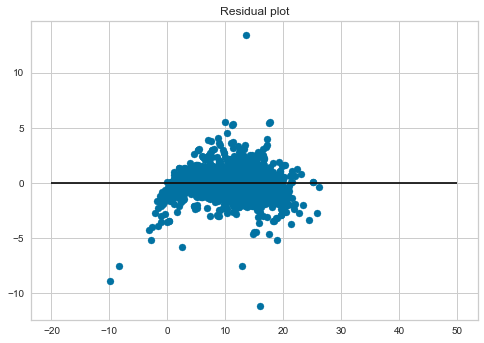

In [10]:
# residual plot
Xplot = plt.scatter(pred, (pred - yTest), c='b')

plt.hlines(y=0, xmin= -20, xmax=50)

plt.title('Residual plot')

## Test different subsets of input features to see which subset(s) may produce the best results in the predictive models.

Above, I ran a function to see which of the PCA components are the best features.  I ran various basic regression models using those variables to see how well they did compared to the baseline linear regression model with all variables.  The top PCA components did not result in good baseline regression models.

Next, I created subsets of the features and ran baseline linear regression models with these subsets to try to identify a smaller set of variables to use model evaluation instead of using all the features.  Below are the best performing of those subsets in baseline linear regression models.

In [12]:
# create a subset of the df that can be used for train and validation data splitting

subset1 = df.loc[:, ['portfolio_cash',
 'portfolio_stocks',
 'portfolio_bonds',
 'portfolio_others',
 'portfolio_preferred',
 'portfolio_convertable']]

# separate data into training and validation 
S1Train, S1Test, yTrain_S1, yTest_S1 = train_test_split(subset1, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS1 = LinearRegression()

# Fit the model with training data
olsS1.fit(S1Train, yTrain_S1)

# evaluate the baseline with the r-squared score
print(olsS1.score(S1Test, yTest_S1))

0.7129487498094862


In [149]:
# create a subset of the df that can be used for train and validation data splitting

subset2 = df.loc[:, [
 'rating_aaa',
 'rating_aa',
 'rating_a',
 'rating_bbb',
 'rating_bb',
 'rating_b',
 'rating_below_b',
 'rating_others']]

# separate data into training and validation 
S2Train, S2Test, yTrain_S2, yTest_S2 = train_test_split(subset2, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS2 = LinearRegression()

# Fit the model with training data
olsS2.fit(S2Train, yTrain_S2)

# evaluate the baseline with the r-squared score
print(olsS2.score(S2Test, yTest_S2))

0.4788733496452161


In [11]:
# create a subset of the df that can be used for train and validation data splitting

subset3 = df.loc[:, [
 'fund_return_1month',
 'category_return_1month',
 'fund_return_3months',
 'fund_return_1year',
 'category_return_1year',
 'fund_return_3years',
 'category_return_3years',
 'fund_return_5years',
 'category_return_5years',
 'fund_return_10years',
 'category_return_10years',
 'fund_return_2018',
 'category_return_2018',
 'fund_return_2017',
 'category_return_2017',
 'fund_return_2016',
 'category_return_2016',
 'fund_return_2015',
 'category_return_2015']]

# separate data into training and validation 
S3Train, S3Test, yTrain_S3, yTest_S3 = train_test_split(subset3, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS3 = LinearRegression()

# Fit the model with training data
olsS3.fit(S3Train, yTrain_S3)

# evaluate the baseline with the r-squared score
print(olsS3.score(S3Test, yTest_S3))

0.9603314014662799


In [165]:
# create a subset of the df that can be used for train and validation data splitting

subset4 = df.loc[:, [
 'category_return_1month',
 'category_return_1year',
 'category_return_3years',
 'category_return_5years',
 'category_return_10years',
 'category_return_2018',
 'category_return_2017',
 'category_return_2016',
 'category_return_2015']]

# separate data into training and validation 
S4Train, S4Test, yTrain_S4, yTest_S4 = train_test_split(subset4, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS4 = LinearRegression()

# Fit the model with training data
olsS4.fit(S4Train, yTrain_S4)

# evaluate the baseline with the r-squared score
print(olsS4.score(S4Test, yTest_S4))

0.838066638842735


In [167]:
# create a subset of the df that can be used for train and validation data splitting

subset5 = df.loc[:, [
 'fund_return_1month',
 'fund_return_3months',
 'fund_return_1year',
 'fund_return_3years',
 'fund_return_5years',
 'fund_return_10years',
 'fund_return_2018',
 'fund_return_2017',
 'fund_return_2016',
 'fund_return_2015']]

# separate data into training and validation 
S5Train, S5Test, yTrain_S5, yTest_S5 = train_test_split(subset5, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS5 = LinearRegression()

# Fit the model with training data
olsS5.fit(S5Train, yTrain_S5)

# evaluate the baseline with the r-squared score
print(olsS5.score(S5Test, yTest_S5))

0.9562559679065663


In [172]:
# create a subset of the df that can be used for train and validation data splitting

subset6 = df.loc[:, [
 'fund_mean_annual_return_3years',
 'category_mean_annual_return_3years',
 'fund_mean_annual_return_5years',
 'category_mean_annual_return_5years',
 'category_mean_annual_return_10years']]

# separate data into training and validation 
S6Train, S6Test, yTrain_S6, yTest_S6 = train_test_split(subset6, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS6 = LinearRegression()

# Fit the model with training data
olsS6.fit(S6Train, yTrain_S6)

# evaluate the baseline with the r-squared score
print(olsS6.score(S6Test, yTest_S6))

0.8108853227418291


In [175]:
# create a subset of the df that can be used for train and validation data splitting

subset7 = df.loc[:, [
 'fund_standard_deviation_3years',
 'category_standard_deviation_3years',
 'fund_standard_deviation_5years',
 'category_standard_deviation_5years',
 'category_standard_deviation_10years']]

# separate data into training and validation 
S7Train, S7Test, yTrain_S7, yTest_S7 = train_test_split(subset7, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS7 = LinearRegression()

# Fit the model with training data
olsS7.fit(S7Train, yTrain_S7)

# evaluate the baseline with the r-squared score
print(olsS7.score(S7Test, yTest_S7))

0.7895946634427098


In [13]:
# create a subset of the df that can be used for train and validation data splitting

subset8 = dfDumm.loc[:, [
 'investment_Blend',
 'investment_Growth',
 'investment_Value']]

# separate data into training and validation 
S8Train, S8Test, yTrain_S8, yTest_S8 = train_test_split(subset8, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS8 = LinearRegression()

# Fit the model with training data
olsS8.fit(S8Train, yTrain_S8)

# evaluate the baseline with the r-squared score
print(olsS8.score(S8Test, yTest_S8))

0.23751658729364955


In [182]:
# create a subset of the df that can be used for train and validation data splitting

subset9 = dfDumm.loc[:, [
 'size_Large',
 'size_Medium',
 'size_Small']]

# separate data into training and validation 
S9Train, S9Test, yTrain_S9, yTest_S9 = train_test_split(subset9, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS9 = LinearRegression()

# Fit the model with training data
olsS9.fit(S9Train, yTrain_S9)

# evaluate the baseline with the r-squared score
print(olsS9.score(S9Test, yTest_S9))

0.10695349234587892


In [190]:
# create a subset of the df that can be used for train and validation data splitting

subset10 = dfDumm.loc[:, [
 'median_market_cap',
 'fund_return_1month']]

# separate data into training and validation 
S10Train, S10Test, yTrain_S10, yTest_S10 = train_test_split(subset10, y, test_size =0.3, random_state=11)

# Instantiate the linear regression model using default parameters
olsS10 = LinearRegression()

# Fit the model with training data
olsS10.fit(S10Train, yTrain_S10)

# evaluate the baseline with the r-squared score
print(olsS10.score(S10Test, yTest_S10))

0.21552238336802754
